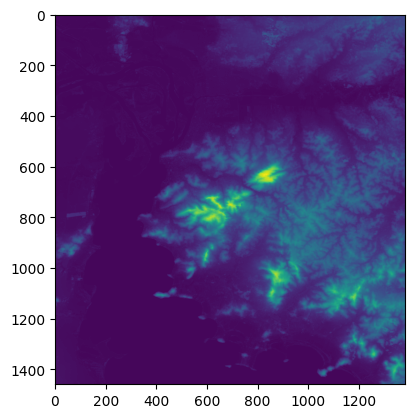

In [1]:
import rasterio
import numpy as np
from rasterio.plot import show

arr = np.array([])
with rasterio.open('../data/output_COP30.tif', 'r') as ds:
    arr = ds.read()
    show(arr)

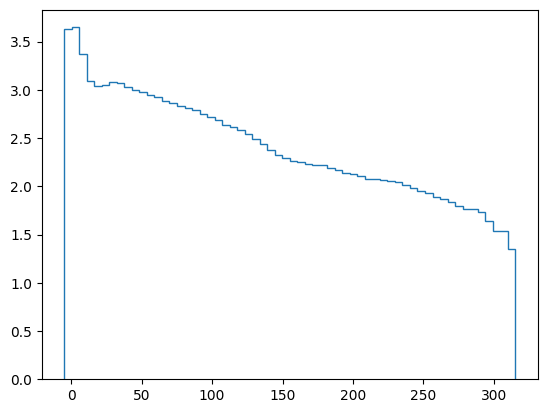

In [2]:
import matplotlib.pyplot as plt

counts, bins = np.histogram(arr[0].flatten(), bins=60)
plt.stairs(counts ** (1/10), bins)

In [3]:
np.shape(arr)

(1, 1459, 1382)

In [4]:
from scipy.spatial import Delaunay

h, w = arr[0].shape

# Create an array of coordinates in the range of the image size
y, x = np.mgrid[:h, :w]

# Flatten the arrays and stack them together
# Then transpose to get an array of [x, y] pairs
coords = np.stack((x.flatten(), y.flatten())).T

# Perform Delaunay triangulation on the [x, y] pairs
tri = Delaunay(coords)

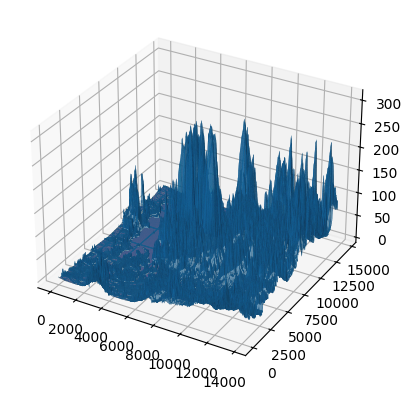

In [5]:
z = arr[0].flatten()
# Plot the 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(coords[:,0] * 10, coords[:,1] * 10, z, triangles=tri.simplices)
plt.show()

In [6]:
import json

vertices = z.tolist()
faces = tri.simplices.tolist()

# Prepare dictionary for JSON
data = {
    "metadata": {
        "version": 4.5,
        "type": 'geometry',
        "generator": 'DelaunayTriangulation'
    },
    "vertices": vertices,
    "faces": faces
}

# Save to a JSON file
with open('model.json', 'w') as f:
    json.dump(data, f)